In [8]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

plt.rcParams["font.family"] = "TeX Gyre Schola Math"

print("Hello there, and welcome to the Jupyter notebook that will hopefully refine M31's proper motion")

Hello there, and welcome to the Jupyter notebook that will hopefully refine M31's proper motion


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Create some empty lists and an angle allowing us to plot ellipses
t = np.linspace(0, 2*np.pi, 3000)
x, y, z = [], [], []
a, b   = [], []
radius = []
PAang  = []    
iang   = []
vel    = []

#We first extract our data
f = open('VelRad.txt', 'r')

kjbznef = 0

for line in f:
    columns = line.split()
    Test = True
    try:
        A = float(columns[0])/60
        B = float(columns[4])*np.pi/180
        C = float(columns[7])*np.pi/180
        D = float(columns[8])
    except:
        Test = False
        
    if Test == True:
        radius.append(A)
        PAang.append(B)
        iang.append(C)
        vel.append(D)
        
        
#The x, y, z lists will be lists of lists for each radius and we already make the inclination transformation
for i in range(len(radius)):
    if radius[i] < 2.5:
        a.append(radius[i])
        b.append(radius[i]*np.cos(iang[i]))
        x.append(a[i]*np.cos(t))
        y.append(b[i]*np.sin(t))
        z.append(-radius[i]*np.sin(iang[i])*np.sin(t))
    else:
        break
        
X, Y, Z = [], [], []

#We treat the PA rotation independently now
for i in range(len(x)):
    X.append(x[i]*np.cos(PAang[i]) - y[i]*np.sin(PAang[i]))
    Y.append(x[i]*np.sin(PAang[i]) + y[i]*np.cos(PAang[i]))

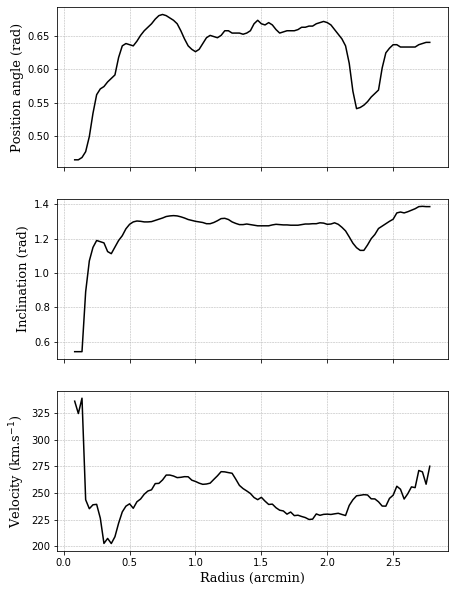

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(7, 10))

ax1.plot(radius, PAang, c='black')
ax1.set_ylabel('Position angle (rad)', fontname = 'Serif', size = 13)
ax1.grid(linestyle='--', linewidth ='0.5')

ax2.plot(radius, iang, c='black')
ax2.set_ylabel('Inclination (rad)', fontname = 'Serif', size = 13)
ax2.grid(linestyle='--', linewidth ='0.5')

ax3.plot(radius, vel, c='black')
ax3.set_xlabel('Radius (arcmin)', fontname = 'Serif', size = 13)
ax3.set_ylabel(r'Velocity (km.s$^{-1}$)', fontname = 'Serif', size = 13)
ax3.grid(linestyle='--', linewidth ='0.5')

plt.savefig('PosIncVel.pdf')
plt.show()

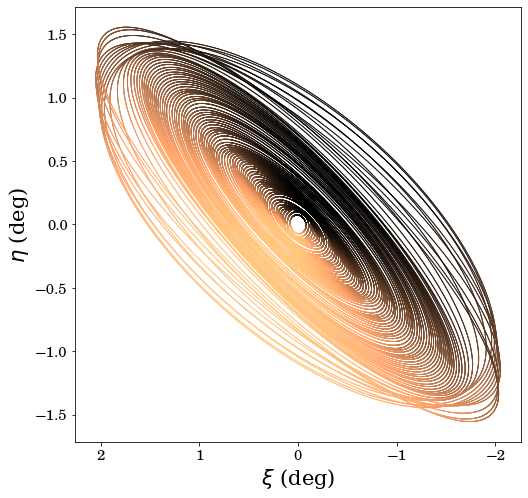

In [20]:
plt.figure(figsize=(8, 8))
for i in range(len(x)):
    plt.scatter(X[i], Y[i], c=z[i], cmap='copper', s=1, linewidth=0)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 21)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 21)
plt.gca().invert_xaxis()
plt.savefig('Ara.png', dpi=500)
plt.show()

## Coordinates of a star: